Cosmology (compact) SS2020

#  Exercise sheet 2

## 1. Build your own Python cosmological calculator (Part I)

### Hubble Parameter
from alternative form of Friedman's equation

$H(z) = H_0 \cdot E(z)$

where $E(z) = \sqrt{\Omega_{r0}\cdot(1+z)^4 + \Omega_{m0}\cdot(1+z)^3 + \Omega_{k0}\cdot(1+z)^2 + \Omega_{\Lambda 0}}$ with $\Omega_{k0} = 1 - \Omega_{r0} - \Omega_{m0} - \Omega_{\Lambda 0}$

### Cosmic Time
from derivative of definition of Hubble parameter

$t = \int_0^a \frac{da'}{a' H(a')} =\int_\infty^{z} \frac{dz'}{(1+z')\cdot H(z')}$


### Density Parameters
from definitions

$a(t) = \frac{1}{1+z}$

$\Omega_m (z) = \frac{\rho(z)}{\rho_{cr}(z)}  = \frac{\rho_0 a^{-3}}{\rho_{cr0} E^2} = \Omega_{m0} \frac{a^{-3}}{E^2}  $

$\Omega_r (z) = \frac{\rho(z)}{\rho_{cr}(z)}  = \frac{\rho_0 a^{-4}}{\rho_{cr0} E^2} = \Omega_{r0} \frac{a^{-4}}{E^2}  $

$\Omega_L (z) = \frac{\rho(z)}{\rho_{cr}(z)}  = \frac{\rho_0}{\rho_{cr0} E^2} = \Omega_{L0} \frac{1}{E^2}  $

$\Omega_k (z) = \frac{\rho(z)}{\rho_{cr}(z)}  = \frac{\rho_0 a^{-2}}{\rho_{cr0} E^2} = \Omega_{k0} \frac{a^{-2}}{E^2}  $

### Distances

$D_{com} = \int_0^{z} \frac{1}{H(z)} dz$

$D_{phys} = D_{com} \cdot a(z)$

In [51]:
import astropy.constants as cst
import scipy.integrate as intg
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

H0 = 67 # km/s /Mpc
km_Mpc = (u.km/u.Mpc).to(1)

def a(z):
    return 1/(1+z)

def E(z, dict):
    return np.sqrt(dict["Omega_r0"]*(1+z)**4+dict["Omega_m0"]*(1+z)**3+(1-dict["Omega_m0"]-dict["Omega_L0"]-dict["Omega_r0"])*(1+z)**2+dict["Omega_L0"])

# Hubble factor
def H(z, dict):
    return H0*E(z,dict)
H_vectorized = np.vectorize(H)

# Cosmic time 
def t_integrand(x, dict):
    return -1/(H(x, dict)*km_Mpc*(1+x))
def t(z, dict):
    return intg.quad(t_integrand, np.inf, z, args=(dict,))
t_vectorized = np.vectorize(t)

# Density parameters
def Omega_m(z, dict):
    return dict["Omega_m0"]*(1+z)**3/E(z, dict)**2
def Omega_r(z, dict):
    return dict["Omega_r0"]*(1+z)**4/E(z, dict)**2
def Omega_L(z, dict):
    return dict["Omega_L0"]/E(z, dict)**2
def Omega_K(z, dict):
    Omega_K0 = 1-dict["Omega_m0"]-dict["Omega_L0"]-dict["Omega_r0"]
    return Omega_K0*(1+z)**2/E(z, dict)**2

# Distances
def D_com_integrand(x, dict):
    return 1/E(x, dict)
def D_com(z, dict):
    return intg.quad(D_com_integrand, 0, z, args=(dict,))
def D_phys(z, dict):
    return D_com(z, dict)[0]/(1+z)
D_com_vectorized = np.vectorize(D_com)
D_phys_vectorized = np.vectorize(D_phys)

### First we assume an Einstein-deSitter universe ($\Omega_m = 1$, $\Omega_\Lambda = 0$)

### Plot H(z), Omega_X(z), dCom(z), dPhys(z), t(z). 

In [49]:
EdS = {"Omega_m0": 1, "Omega_L0": 0, "Omega_r0": 0}

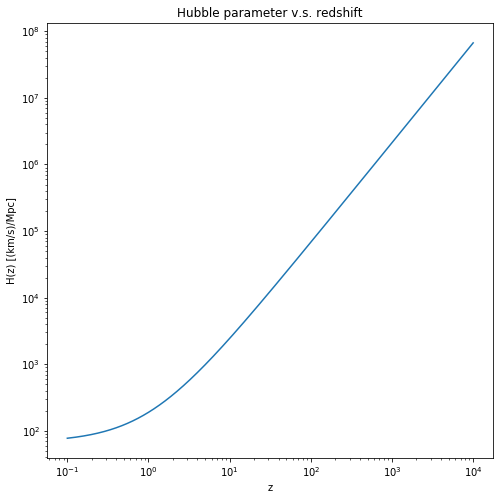

In [52]:
z = np.logspace(-1,  4, num=1000)
plt.figure(figsize = [8, 8])
plt.plot(z, H_vectorized(z,EdS))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("H(z) [(km/s)/Mpc]")
plt.title("Hubble parameter v.s. redshift")
plt.show()

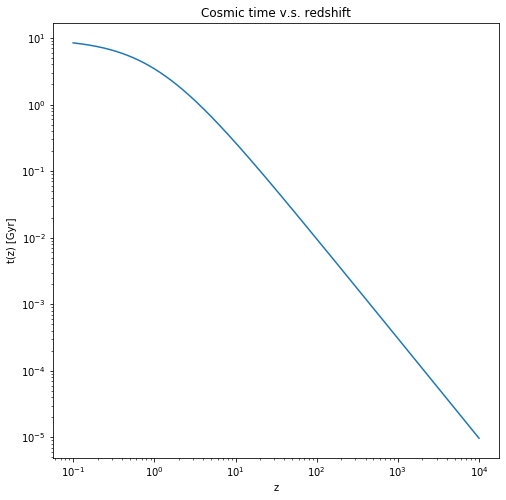

In [53]:
s_to_Gyr = (u.second/u.Gyr).to(1)
time = t_vectorized(z, EdS)[0]*s_to_Gyr
plt.figure(figsize = [8, 8])
plt.plot(z, time)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("t(z) [Gyr]")
plt.title("Cosmic time v.s. redshift")
plt.show()

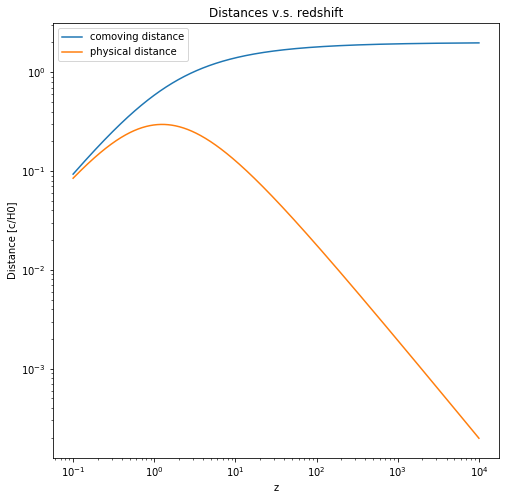

In [54]:
plt.figure(figsize = [8, 8])
plt.plot(z, D_com_vectorized(z,EdS)[0], label = "comoving distance")
plt.plot(z, D_phys_vectorized(z,EdS), label = "physical distance")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("Distance [c/H0]")
plt.legend()
plt.title("Distances v.s. redshift")
plt.show()

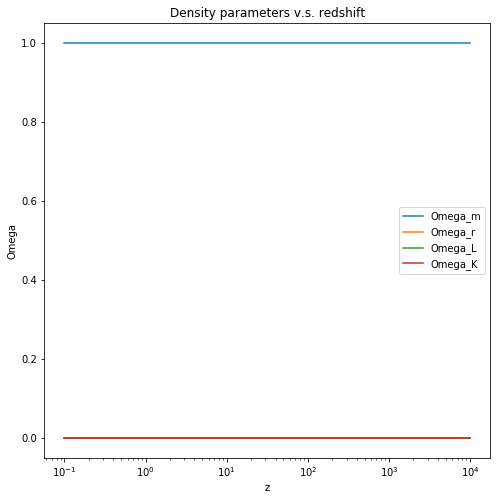

In [55]:
plt.figure(figsize = [8, 8])
plt.plot(z, Omega_m(z,EdS), label = "Omega_m")
plt.plot(z, Omega_r(z,EdS), label = "Omega_r")
plt.plot(z, Omega_L(z,EdS), label = "Omega_L")
plt.plot(z, Omega_K(z,EdS), label = "Omega_K")
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("z")
plt.ylabel("Omega")
plt.legend()
plt.title("Density parameters v.s. redshift")
plt.show()

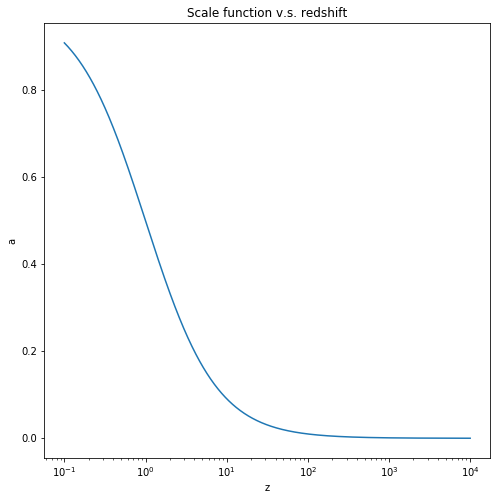

In [56]:
plt.figure(figsize = [8, 8])
plt.plot(z, a(z))
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("z")
plt.ylabel("a")
plt.title("Scale function v.s. redshift")
plt.show()

### Discussion: 

The produced plots correspond to what we expect in an Einstein-deSitter Universe. We could for example check the behaviour of all quantities as z goes to 0, which should show us a normalization by present universe, since our current measurements shows also that the Universe is spatially flat. This is showed in plots H(z->0)-> 70, t(z->0) -> 9 Gyr, distances(z->0) < 0.1 c/H0, a(z->0) -> 1.


### Then we assume a few Universes with different $\Omega_m$.

U1. $\Omega_m = 0.7$, $\Omega_\Lambda = 0$

U2. $\Omega_m = 0.3$, $\Omega_\Lambda = 0$

U3. $\Omega_m = 0.1$, $\Omega_\Lambda = 0$

In [57]:
U1 = {"Omega_m0": 0.7, "Omega_L0": 0, "Omega_r0": 0}
U2 = {"Omega_m0": 0.3, "Omega_L0": 0, "Omega_r0": 0}
U3 = {"Omega_m0": 0.1, "Omega_L0": 0, "Omega_r0": 0}

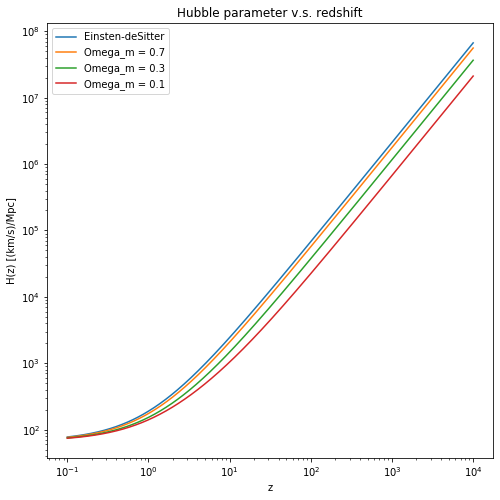

In [58]:
z = np.logspace(-1,  4, num=1000)
plt.figure(figsize = [8, 8])
plt.plot(z, H_vectorized(z,EdS), label = "Einsten-deSitter")
plt.plot(z, H_vectorized(z,U1), label = "Omega_m = 0.7")
plt.plot(z, H_vectorized(z,U2), label = "Omega_m = 0.3")
plt.plot(z, H_vectorized(z,U3), label = "Omega_m = 0.1")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("z")
plt.ylabel("H(z) [(km/s)/Mpc]")
plt.title("Hubble parameter v.s. redshift")
plt.show()

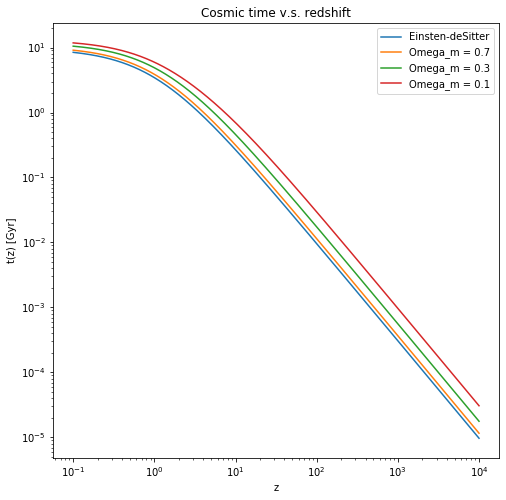

In [59]:
plt.figure(figsize = [8, 8])
plt.plot(z, t_vectorized(z,EdS)[0]*s_to_Gyr, label = "Einsten-deSitter")
plt.plot(z, t_vectorized(z,U1)[0]*s_to_Gyr, label = "Omega_m = 0.7")
plt.plot(z, t_vectorized(z,U2)[0]*s_to_Gyr, label = "Omega_m = 0.3")
plt.plot(z, t_vectorized(z,U3)[0]*s_to_Gyr, label = "Omega_m = 0.1")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("t(z) [Gyr]")
plt.title("Cosmic time v.s. redshift")
plt.show()

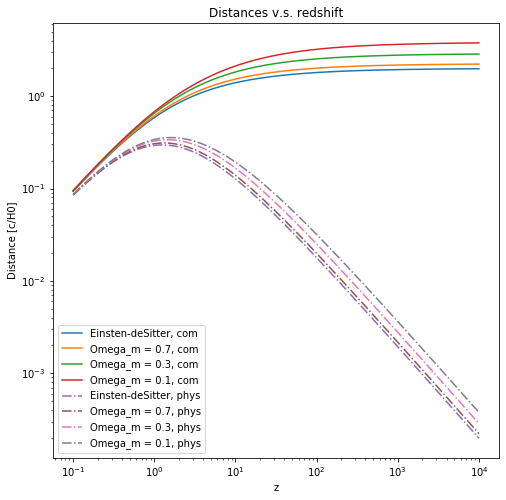

In [60]:
plt.figure(figsize = [8, 8])
plt.plot(z, D_com_vectorized(z,EdS)[0], label = "Einsten-deSitter, com")
plt.plot(z, D_com_vectorized(z,U1)[0], label = "Omega_m = 0.7, com")
plt.plot(z, D_com_vectorized(z,U2)[0], label = "Omega_m = 0.3, com")
plt.plot(z, D_com_vectorized(z,U3)[0], label = "Omega_m = 0.1, com")
plt.plot(z, D_phys_vectorized(z,EdS), "-.", label = "Einsten-deSitter, phys")
plt.plot(z, D_phys_vectorized(z,U1), "-.", label = "Omega_m = 0.7, phys")
plt.plot(z, D_phys_vectorized(z,U2), "-.", label = "Omega_m = 0.3, phys")
plt.plot(z, D_phys_vectorized(z,U3), "-.",  label = "Omega_m = 0.1, phys")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("Distance [c/H0]")
plt.legend()
plt.title("Distances v.s. redshift")
plt.show()

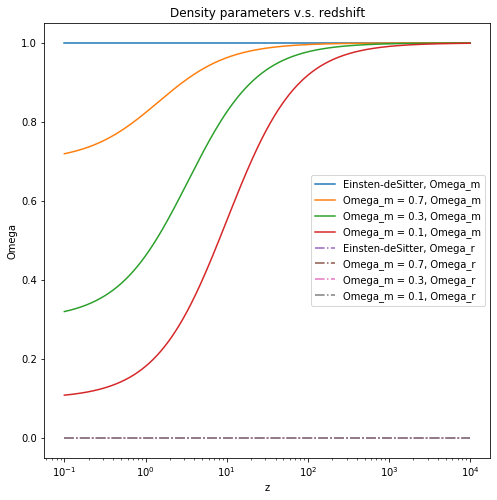

In [61]:
plt.figure(figsize = [8, 8])
plt.plot(z, Omega_m(z,EdS), label = "Einsten-deSitter, Omega_m")
plt.plot(z, Omega_m(z,U1), label = "Omega_m = 0.7, Omega_m")
plt.plot(z, Omega_m(z,U2), label = "Omega_m = 0.3, Omega_m")
plt.plot(z, Omega_m(z,U3), label = "Omega_m = 0.1, Omega_m")
plt.plot(z, Omega_r(z,EdS), "-.", label = "Einsten-deSitter, Omega_r")
plt.plot(z, Omega_r(z,U1), "-.", label = "Omega_m = 0.7, Omega_r")
plt.plot(z, Omega_r(z,U2), "-.", label = "Omega_m = 0.3, Omega_r")
plt.plot(z, Omega_r(z,U3), "-.",  label = "Omega_m = 0.1, Omega_r")
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("z")
plt.ylabel("Omega")
plt.legend()
plt.title("Density parameters v.s. redshift")
plt.show()

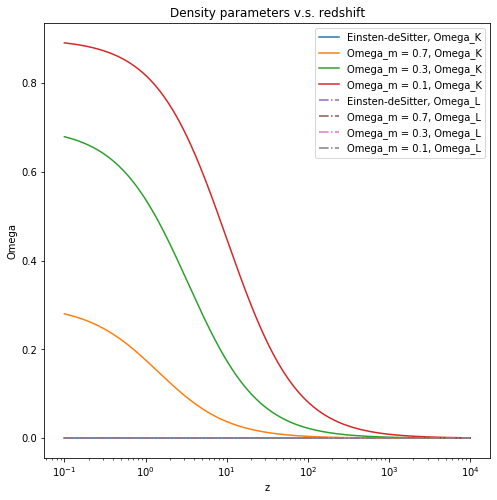

In [62]:
plt.figure(figsize = [8, 8])
plt.plot(z, Omega_K(z,EdS), "-", label = "Einsten-deSitter, Omega_K")
plt.plot(z, Omega_K(z,U1), "-", label = "Omega_m = 0.7, Omega_K")
plt.plot(z, Omega_K(z,U2), "-", label = "Omega_m = 0.3, Omega_K")
plt.plot(z, Omega_K(z,U3), "-",  label = "Omega_m = 0.1, Omega_K")
plt.plot(z, Omega_L(z,EdS), "-.", label = "Einsten-deSitter, Omega_L")
plt.plot(z, Omega_L(z,U1), "-.", label = "Omega_m = 0.7, Omega_L")
plt.plot(z, Omega_L(z,U2), "-.", label = "Omega_m = 0.3, Omega_L")
plt.plot(z, Omega_L(z,U3), "-.",  label = "Omega_m = 0.1, Omega_L")
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("z")
plt.ylabel("Omega")
plt.legend()
plt.title("Density parameters v.s. redshift")
plt.show()

### Discussion

The above plots show evolution of matter-dominated Universes with differnt $\Omega_{m0}$. We observe that they show similar evolutionary tendency of Hubble parameter, cosmic time, and distances. While all Universes starting from $\Omega_{m0}$ close to 1 at high redshift, the largest differences happen at low redshift, where only the Einsten-deSitter Universe remains flat and all other Universes form curvature.

### Now we comapare the Einstein-deSitter Universe with the standard cosmological model LCDM ($\Omega_{\Lambda} = 0.685, \Omega_m = 0.315, \Omega_r = 2.47\times10^{-5}h^{-2}$)

In [63]:
LCDM = {"Omega_m0": 0.315, "Omega_L0": 0.685, "Omega_r0": 2.47*10**(-5)*(H0/100)**(-2)}

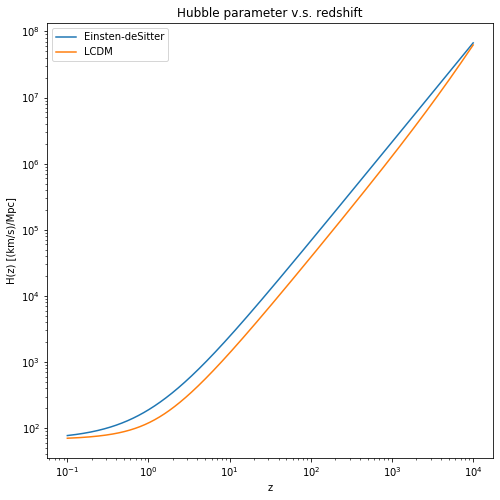

In [64]:
z = np.logspace(-1,  4, num=1000)
plt.figure(figsize = [8, 8])
plt.plot(z, H_vectorized(z,EdS), label = "Einsten-deSitter")
plt.plot(z, H_vectorized(z,LCDM), label = "LCDM")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("z")
plt.ylabel("H(z) [(km/s)/Mpc]")
plt.title("Hubble parameter v.s. redshift")
plt.show()

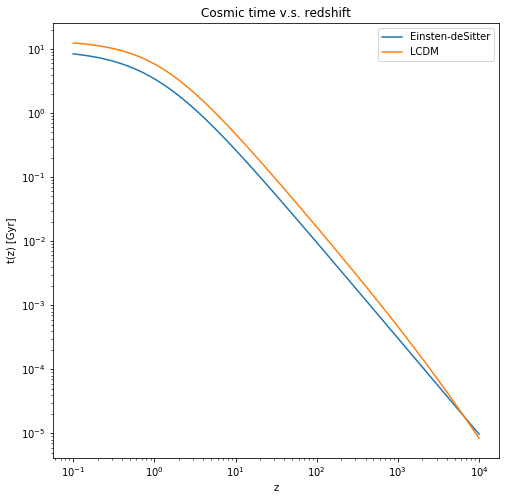

In [65]:
plt.figure(figsize = [8, 8])
plt.plot(z, t_vectorized(z,EdS)[0]*s_to_Gyr, label = "Einsten-deSitter")
plt.plot(z, t_vectorized(z,LCDM)[0]*s_to_Gyr, label = "LCDM")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("t(z) [Gyr]")
plt.title("Cosmic time v.s. redshift")
plt.show()

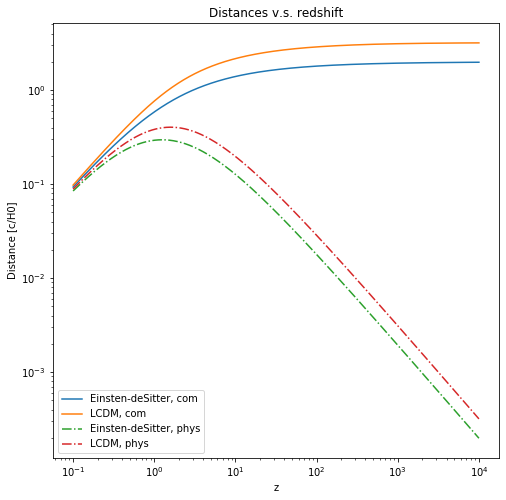

In [66]:
plt.figure(figsize = [8, 8])
plt.plot(z, D_com_vectorized(z,EdS)[0], label = "Einsten-deSitter, com")
plt.plot(z, D_com_vectorized(z,LCDM)[0], label = "LCDM, com")
plt.plot(z, D_phys_vectorized(z,EdS), "-.", label = "Einsten-deSitter, phys")
plt.plot(z, D_phys_vectorized(z,LCDM), "-.", label = "LCDM, phys")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("Distance [c/H0]")
plt.legend()
plt.title("Distances v.s. redshift")
plt.show()

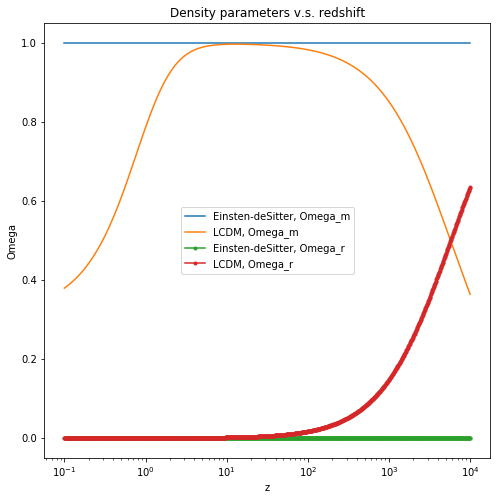

In [69]:
plt.figure(figsize = [8, 8])
plt.plot(z, Omega_m(z,EdS), label = "Einsten-deSitter, Omega_m")
plt.plot(z, Omega_m(z,LCDM), label = "LCDM, Omega_m")
plt.plot(z, Omega_r(z,EdS), ".-", label = "Einsten-deSitter, Omega_r")
plt.plot(z, Omega_r(z,LCDM), ".-", label = "LCDM, Omega_r")
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("z")
plt.ylabel("Omega")
plt.legend()
plt.title("Density parameters v.s. redshift")
plt.show()

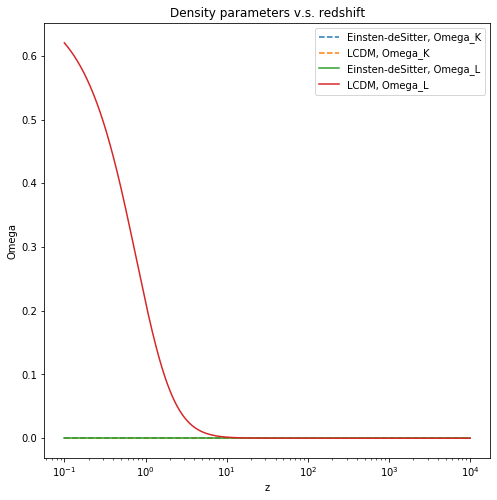

In [71]:
plt.figure(figsize = [8, 8])
plt.plot(z, Omega_K(z,EdS), "--", label = "Einsten-deSitter, Omega_K")
plt.plot(z, Omega_K(z,LCDM), "--", label = "LCDM, Omega_K")
plt.plot(z, Omega_L(z,EdS), "-", label = "Einsten-deSitter, Omega_L")
plt.plot(z, Omega_L(z,LCDM), "-", label = "LCDM, Omega_L")
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("z")
plt.ylabel("Omega")
plt.legend()
plt.title("Density parameters v.s. redshift")
plt.show()

### Discussion

The above plots compare evolution of quantities of an Einstein-deSitter Universe and a LCDM Universe. One could see that starting at larger redshift Hubble parameter of the LCDM increases but the increase is more rapid, compared to that of an Einstein-deSitter Universe. That is attribute to different weights (i.e. (1+a)^x) of different $\Omega$ terms in $E(z)$. Similar pattern can be seen for the cosmic time. 